In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt

dataset = pd.read_csv('ParisHousingClass.csv')
dataset.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


## Мода

In [2]:
# значение моды по столбцу
st.mode(dataset.numberOfRooms)

54

In [3]:
# по всем столбцам
dataset.mode(axis=0).iloc[0]

squareMeters          3802.0
numberOfRooms           54.0
hasYard                  1.0
hasPool                  0.0
floors                  97.0
cityCode             16401.0
cityPartRange            8.0
numPrevOwners            4.0
made                  1992.0
isNewBuilt               0.0
hasStormProtector        0.0
basement              1421.0
attic                 3127.0
garage                 253.0
hasStorageRoom           1.0
hasGuestRoom             2.0
price                10313.5
category               Basic
Name: 0, dtype: object

In [4]:
dataset.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [5]:
st.mean(dataset['hasYard'])

0.5087

In [6]:
# Медиана
dataset['numberOfRooms'].median()

50.0

In [7]:
# Средневзвешенное значение
wmean = np.average(dataset['squareMeters'], weights=dataset['numberOfRooms'])
print(wmean)

50027.73716003686


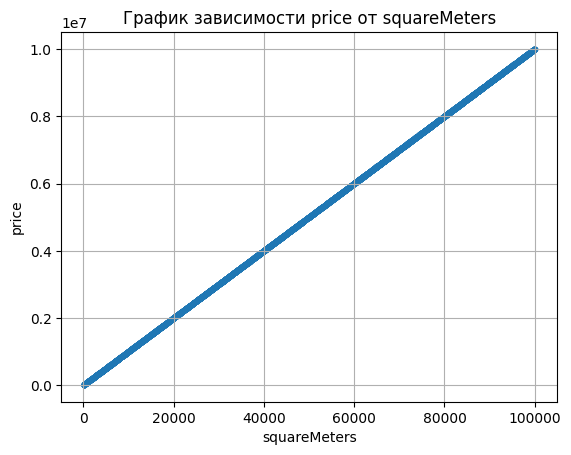

In [8]:
x = dataset['squareMeters'].values
y = dataset['price'].values

plt.xlabel('squareMeters')
plt.ylabel('price')
plt.title('График зависимости price от squareMeters')
plt.grid(True)
plt.scatter(x, y, marker='.')

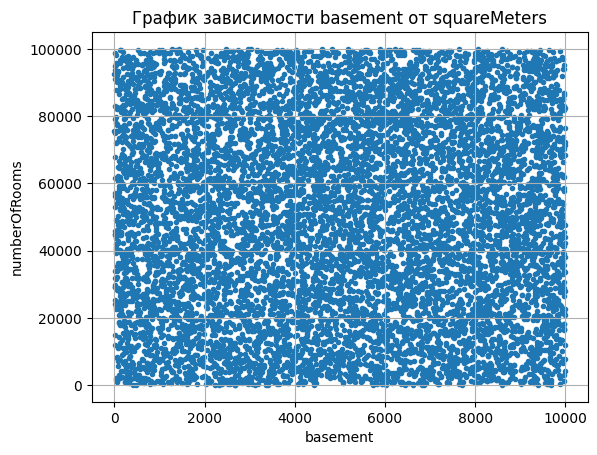

In [9]:
x = dataset['basement'].values
y = dataset['squareMeters'].values

plt.xlabel('basement')
plt.ylabel('numberOfRooms')
plt.title('График зависимости basement от squareMeters')
plt.grid(True)
plt.scatter(x, y, marker='.')

## Баланс данных

Class Basic: 8735
Class Luxury: 1265
Пропорция: 6.91 : 1


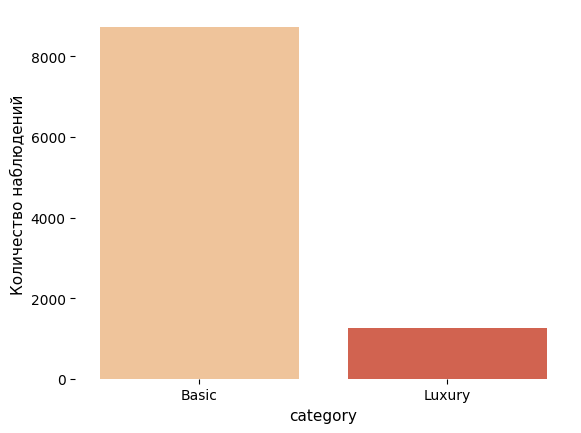

In [10]:
import seaborn as sns

# Проверка баланса выходной переменной
target_count = dataset.category.value_counts()
print('Class Basic:', target_count.iloc[0])
print('Class Luxury:', target_count.iloc[1])
print('Пропорция:', round(target_count.iloc[0] / target_count.iloc[1], 2), ': 1')

sns.countplot(x='category', data=dataset, hue='category', palette="OrRd")
plt.box(False)
plt.xlabel('category',fontsize=11)
plt.ylabel('Количество наблюдений',fontsize=11)
plt.show()

Class Basic: 1300
Class Luxury: 1265
Пропорция: 1.03 : 1


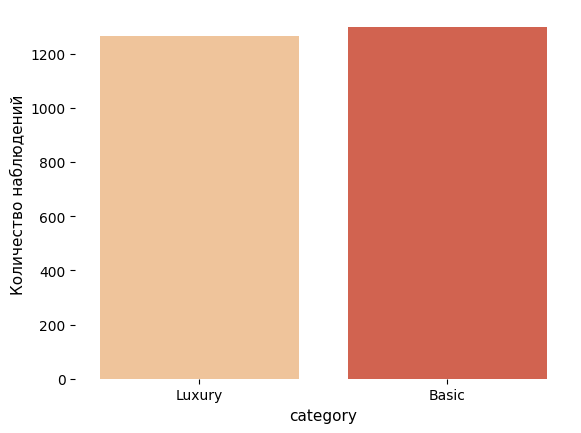

In [11]:
# перемешаем датафрейм
df = dataset
shuffled_df = df.sample(frac=1,random_state=4)

# Поместите весь класс 1 в отдельный набор данных.
CHD_df = shuffled_df.loc[shuffled_df['category'] == 'Luxury']

#Произвольно выберем 1300 наблюдения из класса 0 (класс большинства)
non_CHD_df = shuffled_df.loc[shuffled_df['category'] == 'Basic'].sample(n=1300,random_state=42)

# Снова объедините оба фрейма данных
normalized_df = pd.concat([CHD_df, non_CHD_df])

# проверить количество новых классов
target_count = normalized_df.category.value_counts()
print('Class Basic:', target_count.iloc[0])
print('Class Luxury:', target_count.iloc[1])
print('Пропорция:', round(target_count.iloc[0] / target_count.iloc[1], 2), ': 1')

sns.countplot(x='category', data=normalized_df, hue='category', palette="OrRd")
plt.box(False)
plt.xlabel('category',fontsize=11)
plt.ylabel('Количество наблюдений',fontsize=11)
plt.show()

## Андерсэмплинг с использованием Tomek Links

In [12]:
from imblearn.under_sampling import TomekLinks

X=df.iloc[:,0:17]
y=df['category']

tl = TomekLinks(sampling_strategy='majority')
X_res, y_res = tl.fit_resample(X, y)
print(X_res.shape)
print(X.shape)
df_new=pd.concat([X_res, y_res], axis=1)
df_new.shape

(9329, 17)
(10000, 17)


(9329, 18)

## Оверсэмплинг:

(17470, 17)
(10000, 17)
(17470, 18)


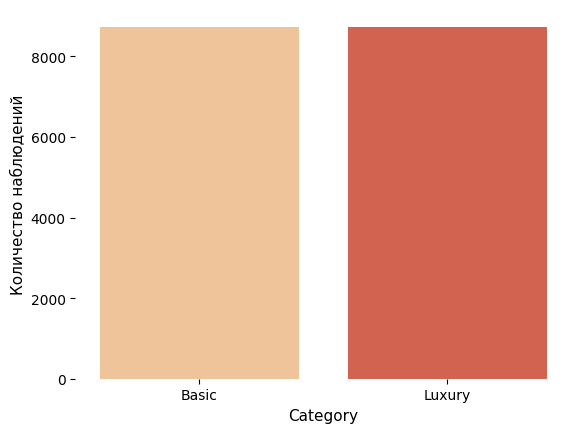

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
print(X_sm.shape)
print(X.shape)
df_new_sm=pd.concat([X_sm, y_sm], axis=1)
df_new_sm.shape
print(df_new_sm.shape)

sns.countplot(x='category', data=df_new_sm, hue='category', palette="OrRd")
plt.box(False)
plt.xlabel('Category',fontsize=11)
plt.ylabel('Количество наблюдений',fontsize=11)
plt.show()

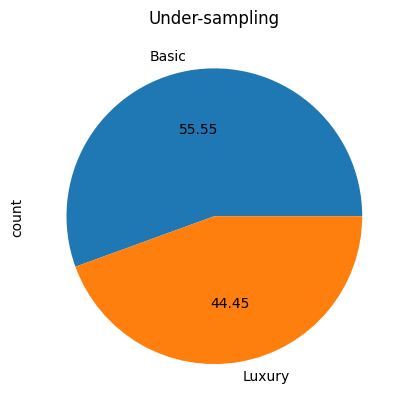

In [14]:
from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = 0.8
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)
autopct = "%.2f"
ax = y_res.value_counts().plot.pie(autopct=autopct)
_ = ax.set_title("Under-sampling")

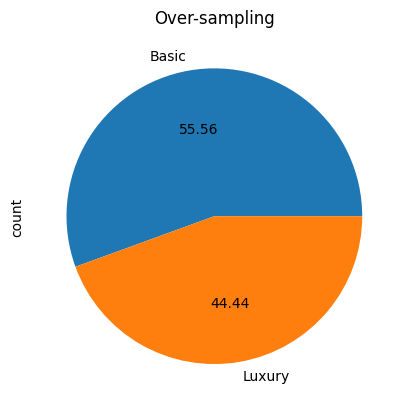

In [15]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_s, y_s = ros.fit_resample(X, y)
ax = y_s.value_counts().plot.pie(autopct=autopct)
_ = ax.set_title("Over-sampling")

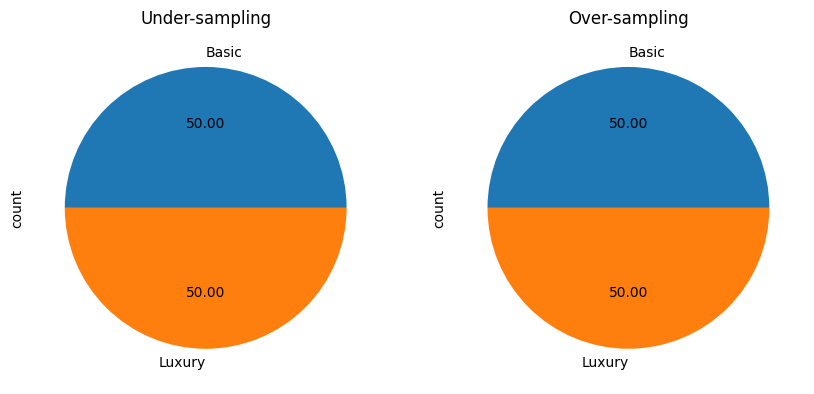

In [16]:
sampling_strategy = "not minority"

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)
y_res.value_counts().plot.pie(autopct=autopct, ax=axs[0])
axs[0].set_title("Under-sampling")

sampling_strategy = "not majority"
ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_s, y_s = ros.fit_resample(X, y)
y_s.value_counts().plot.pie(autopct=autopct, ax=axs[1])
_ = axs[1].set_title("Over-sampling")